In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv("ratings_Beauty.csv", delimiter=',')
data.head()

UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [4]:
data = data.dropna()

In [5]:
data.shape

(2023070, 4)

In [6]:
data = data.drop(columns='Timestamp')

<Axes: xlabel='ProductId'>

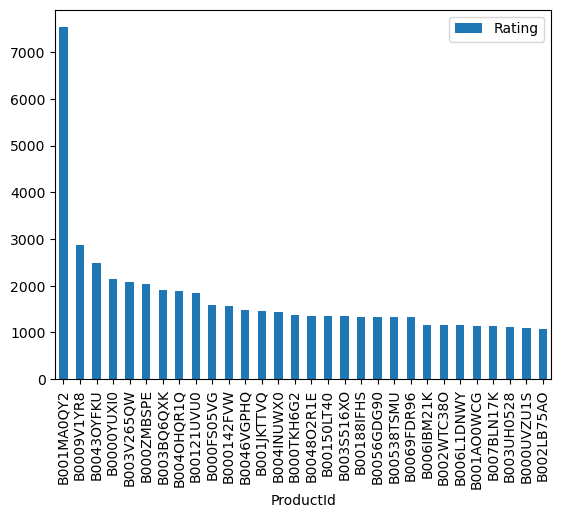

In [7]:
popular_products = pd.DataFrame(data.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [8]:
# Assuming df is your DataFrame
user_counts = data['UserId'].value_counts()

# Display the number of occurrences for each UserId
print(user_counts)


UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
AFLE9ZCCERY6L       1
A2U2AW7L2BU1S       1
A2KNQZY2DU4H8I      1
A6J6SJ1063P79       1
A3MQDRRGC9070R      1
Name: count, Length: 1210271, dtype: int64


In [9]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# data['EncodedUserId'] = label_encoder.fit_transform(data['UserId'])

In [10]:
data1 = data.head(20000)

In [11]:
user_product_matrix = data1.pivot_table(index='UserId', columns='ProductId', values='Rating', fill_value=0)
user_product_matrix.head()

ProductId              0205616461  0558925278  0733001998  0737104473  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A00473363TJ8YSZ3YAGG9           0           0           0           0   
A01437583CZ7V02UKZQ5S           0           0           0           0   
A020135981U0UNEAE4JV            0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   

ProductId              0762451459  1304139212  1304139220  130414089X  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A00473363TJ8YSZ3YAGG9           0           0           0           0   
A01437583CZ7V02UKZQ5S           0           0           0           0   
A020135981U0UNEAE4JV            0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   

ProductId              130414643X  1304146537  ...  B00005BJ8X  B00005BJ91  \
UserId                                         ...                           
A00205921JHJK5X9LNP42           0           0  ...           0           0   
A00473363TJ8YSZ3YAGG9           0           0  ...           0           0   
A01437583CZ7V02UKZQ5S           0           0  ...           0           0   
A020135981U0UNEAE4JV            0           0  ...           0           0   
A024581134CV80ZBLIZTZ           0           0  ...           0           0   

ProductId              B00005BL1R  B00005BLRH  B00005BWXD  B00005CDRP  \
UserId                                                                  
A00205921JHJK5X9LNP42           0           0           0           0   
A00473363TJ8YSZ3YAGG9           0           0           0           0   
A01437583CZ7V02UKZQ5S           0           0           0           0   
A020135981U0UNEAE4JV            0           0           0           0   
A024581134CV80ZBLIZTZ           0           0           0           0   

ProductId              B00005CDRY  B00005CDS5  B00005CDS7  B00005CDS9  
UserId                                                                 
A00205921JHJK5X9LNP42           0           0           0           0  
A00473363TJ8YSZ3YAGG9           0           0           0           0  
A01437583CZ7V02UKZQ5S           0           0           0           0  
A020135981U0UNEAE4JV            0           0           0           0  
A024581134CV80ZBLIZTZ           0           0           0           0  

[5 rows x 1398 columns]

In [12]:
product_user_matrix = user_product_matrix.T
product_user_matrix.head()

UserId      A00205921JHJK5X9LNP42  A00473363TJ8YSZ3YAGG9  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   

UserId      A01437583CZ7V02UKZQ5S  A020135981U0UNEAE4JV  \
ProductId                                                 
0205616461                      0                     0   
0558925278                      0                     0   
0733001998                      0                     0   
0737104473                      0                     0   
0762451459                      0                     0   

UserId      A024581134CV80ZBLIZTZ  A03056581JJIOL5FSKJY7  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   

UserId      A03099101ZRK4K607JVHH  A03454732N8VEYJAMGTTH  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   

UserId      A0505229A7NSH3FRXRR4  A05492663T95KW63BR75K  ...  AZYR51QTD6FAY  \
ProductId                                                ...                  
0205616461                     0                      0  ...              0   
0558925278                     0                      0  ...              0   
0733001998                     0                      0  ...              0   
0737104473                     0                      0  ...              0   
0762451459                     0                      0  ...              0   

UserId      AZZ5ENX41WOYZ  AZZ8A0TEQOD7J  AZZDA9BRMPP1B  AZZHB6U54UDYW  \
ProductId                                                                
0205616461              0              0              0              0   
0558925278              0              0              0              0   
0733001998              0              0              0              0   
0737104473              0              0              0              0   
0762451459              0              0              0              0   

UserId      AZZHJZP4GQPPZ  AZZNK89PXD006  AZZOFVMQC0BJG  AZZQXL8VDCFTV  \
ProductId                                                                
0205616461              0              0              0              0   
0558925278              0              0              0              0   
0733001998              0              0              0              0   
0737104473              0              0              0              0   
0762451459              0              0              0              0   

UserId      AZZTJQ7CQZUD8  
ProductId                  
0205616461              0  
0558925278              0  
0733001998              0  
0737104473              0  
0762451459              0  

[5 rows x 19101 columns]

In [13]:
non_null_values = product_user_matrix.stack().reset_index(name='Rating')
print(non_null_values)


           ProductId                 UserId  Rating
0         0205616461  A00205921JHJK5X9LNP42       0
1         0205616461  A00473363TJ8YSZ3YAGG9       0
2         0205616461  A01437583CZ7V02UKZQ5S       0
3         0205616461   A020135981U0UNEAE4JV       0
4         0205616461  A024581134CV80ZBLIZTZ       0
...              ...                    ...     ...
26703193  B00005CDS9          AZZHJZP4GQPPZ       0
26703194  B00005CDS9          AZZNK89PXD006       0
26703195  B00005CDS9          AZZOFVMQC0BJG       0
26703196  B00005CDS9          AZZQXL8VDCFTV       0
26703197  B00005CDS9          AZZTJQ7CQZUD8       0

[26703198 rows x 3 columns]


In [18]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors



# Create User-Product Matrix
user_product_matrix = data1.pivot_table(index='UserId', columns='ProductId', values='Rating', fill_value=0)

# User similarity matrix using k-NN
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
knn_model.fit(user_product_matrix)

# Picked user ID (replace with your specific user ID)
picked_userid = "A3KEZLJ59C1JVH"
picked_user_ratings = user_product_matrix.loc[picked_userid].values.reshape(1, -1)

# Find k-nearest neighbors
distances, indices = knn_model.kneighbors(picked_user_ratings)

# Display the k-nearest neighbors
similar_users = user_product_matrix.index[indices.flatten()]
print(f"The {knn_model.n_neighbors} nearest neighbors for user {picked_userid} are:")
print(similar_users)

# Narrow Down Item Pool
picked_userid_rated = user_product_matrix.loc[picked_userid][user_product_matrix.loc[picked_userid] > 0]
similar_user_products = user_product_matrix.loc[similar_users].mean(axis=0)
recommended_products = similar_user_products[similar_user_products.index.isin(picked_userid_rated.index) == False]

# Recommend top m products
m = 10
recommended_products = recommended_products.sort_values(ascending=False).head(m)
print("Recommended Products:")
print(recommended_products)


C:\Users\salma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


The 10 nearest neighbors for user A3KEZLJ59C1JVH are:
Index(['A3KEZLJ59C1JVH', 'AKNQ36HTHDQ94', 'A2479GW54PIORU', 'A3HRQCE6UXGU6V',
       'A3T5G7XZPODEXS', 'A3IACAOXMJ4AWJ', 'AFCD4K00EGXOB', 'ALZWGAK15U76X',
       'A2ICDDXVALB10W', 'ADI3IAXO8EH2E'],
      dtype='object', name='UserId')
Recommended Products:
ProductId
0205616461    0.0
B000052ZEI    0.0
B000052ZNF    0.0
B000052ZNE    0.0
B000052ZMF    0.0
B000052ZJF    0.0
B000052ZEU    0.0
B000052ZEQ    0.0
B000052ZEO    0.0
B000052ZEK    0.0
dtype: float64
